<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-47/blob/main/Reto/Reto_Entrega2_Equipo47.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Reto:  Entrega 2

## Materia: Ciencia y analítica de datos

Profa. María de la Paz Rico

Prof. Roberto Antonio Guevara González

## Nombres: Adriana Camarillo Durán, Laura Munoz Hernandez

## Matrícula: A01551139, A01167496

Fecha de entrega: 18/11/2022

# Librerías

In [2]:
#@title
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 759 kB/s 
     |████████████████████████████████| 1.0 MB 58.6 MB/s 
     |████████████████████████████████| 1.7 MB 41.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 53.8 MB/s 
     |████████████████████████████████| 6.3 MB 45.2 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=6c50ca82f5d260cb9e31231171e5eeb5177ef1b575d5e42d9340e30ce6afdaa0
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=52e988c67bd955fda349d7a5d4d6e21f78edcf8da106589836254229fe30072c
  Stored in directory: /root/.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn import preprocessing, cluster
from sklearn import preprocessing

import geopandas as gpd
from shapely.geometry import Point

%matplotlib inline
import qeds
qeds.themes.mpl_style();

In [37]:
from sklearn.model_selection import train_test_split,RepeatedStratifiedKFold, GridSearchCV

# Exploración y limpieza de datos


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df_subterraneas = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo-47/main/Reto/Bases_Datos/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv')
df_subterraneas.shape

(1068, 57)

Primero eliminamos las columnas que tengan muchos valores nulos (más del 30%):

In [6]:
df_subterraneas.dropna(axis=1, thresh= 700, inplace= True)
df_subterraneas.shape

(1068, 55)

In [7]:
df_subterraneas.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [8]:
df_subterraneas.dtypes

CLAVE                    object
SITIO                    object
ORGANISMO_DE_CUENCA      object
ESTADO                   object
MUNICIPIO                object
ACUIFERO                 object
SUBTIPO                  object
LONGITUD                float64
LATITUD                 float64
PERIODO                   int64
ALC_mg/L                float64
CALIDAD_ALC              object
CONDUCT_mS/cm           float64
CALIDAD_CONDUC           object
SDT_M_mg/L               object
CALIDAD_SDT_ra           object
CALIDAD_SDT_salin        object
FLUORUROS_mg/L           object
CALIDAD_FLUO             object
DUR_mg/L                 object
CALIDAD_DUR              object
COLI_FEC_NMP/100_mL      object
CALIDAD_COLI_FEC         object
N_NO3_mg/L               object
CALIDAD_N_NO3            object
AS_TOT_mg/L              object
CALIDAD_AS               object
CD_TOT_mg/L              object
CALIDAD_CD               object
CR_TOT_mg/L              object
CALIDAD_CR               object
HG_TOT_m

In [9]:
df_subterraneas.describe(include='all')

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
count,1068,1068,1068,1068,1068,1068,1068,1068.000000,1068.000000,1068.0,1064.000000,1064,1062.000000,1062,1066,1066,1066,1068,1068,1067,1067,1068,1068,1067,1067,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068
unique,1068,1066,13,32,452,273,8,NaN,NaN,NaN,NaN,4,NaN,5,925,5,4,862,4,889,4,125,5,995,3,209,3,3,2,168,2,61,2,31,2,362,3,615,2,3,3,3,3,3,2,3,2,3,2,2,2,2,2,2,2
top,DLAGU6,EL FUERTE,CUENCAS CENTRALES DEL NORTE,DURANGO,LA PAZ,PENINSULA DE YUCATAN,POZO,NaN,NaN,NaN,NaN,Alta,NaN,Permisible para riego,496,Excelente para riego,Potable - Dulce,<0.2,Baja,<20,Potable - Dura,<1.1,Potable - Excelente,<0.02,Potable - Excelente,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
freq,1,2,232,121,27,119,1039,NaN,NaN,NaN,NaN,794,NaN,460,4,491,834,162,434,26,577,737,739,65,788,815,816,1066,1066,854,1053,968,1067,1038,1056,545,982,401,932,434,1005,939,995,995,876,841,1007,985,941,1066,1053,1067,1056,982,932
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-101.891007,23.163618,2020.0,235.633759,NaN,1138.953013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.703263,3.887670,0.0,116.874291,NaN,1245.563674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-116.664250,14.561150,2020.0,26.640000,NaN,50.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-105.388865,20.212055,2020.0,164.000000,NaN,501.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-102.174180,22.617190,2020.0,215.527500,NaN,815.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-98.974716,25.510285,2020.0,292.710000,NaN,1322.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Las variables PERIODO, CLAVE y SITIO son prácticamente iguales para todas las observaciones por lo que también podemos eliminarlas. 

Por otro lado, Las variables ESTADO y MUNICIPIO están directamente relacionadas con la latitud y longitud por lo que no consideramos necesario mantenerlas en la base. 

También observamos que las 4 variables numéricas que quedan tienen medias y medianas similares, por lo que podemos usar el promedio para tratar valores nulos.

Por último vemos que hay 14 variables que miden los niveles de distintos elementos en el agua, pero que también existe una versión equivalente que pone esos valores en categorías. Para evitar tener variables repetidas, nos quedaremos únicamente con las versiones categóricas para las 12 variables que agrupan la variable numérica en valores bajos y con las versiones numéricas para las otras dos.

In [10]:
df_subterraneas.drop(['PERIODO','CLAVE','SITIO','CALIDAD_ALC','CALIDAD_CONDUC','SDT_M_mg/L','FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'CR_TOT_mg/L','HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L','ESTADO', 'MUNICIPIO'], axis=1, inplace= True)

Un vistazo inicial de los datos, parece indicar que podemos dividir las variables en los siguientes grupos:

Variables binarias:

In [11]:
vars_binarias = ['CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR','CUMPLE_CON_CF','CUMPLE_CON_NO3','CUMPLE_CON_AS','CUMPLE_CON_CD','CUMPLE_CON_CR','CUMPLE_CON_HG','CUMPLE_CON_PB', 'CUMPLE_CON_MN','CUMPLE_CON_FE'] #A15

Variables ordinales:

In [12]:
vars_ordinales = ['CALIDAD_SDT_ra','CALIDAD_SDT_salin', 'CALIDAD_FLUO', 'CALIDAD_DUR','CALIDAD_COLI_FEC','CALIDAD_N_NO3','CALIDAD_AS','CALIDAD_CD','CALIDAD_CR', 'CALIDAD_HG','CALIDAD_PB','CALIDAD_MN','CALIDAD_FE'] 

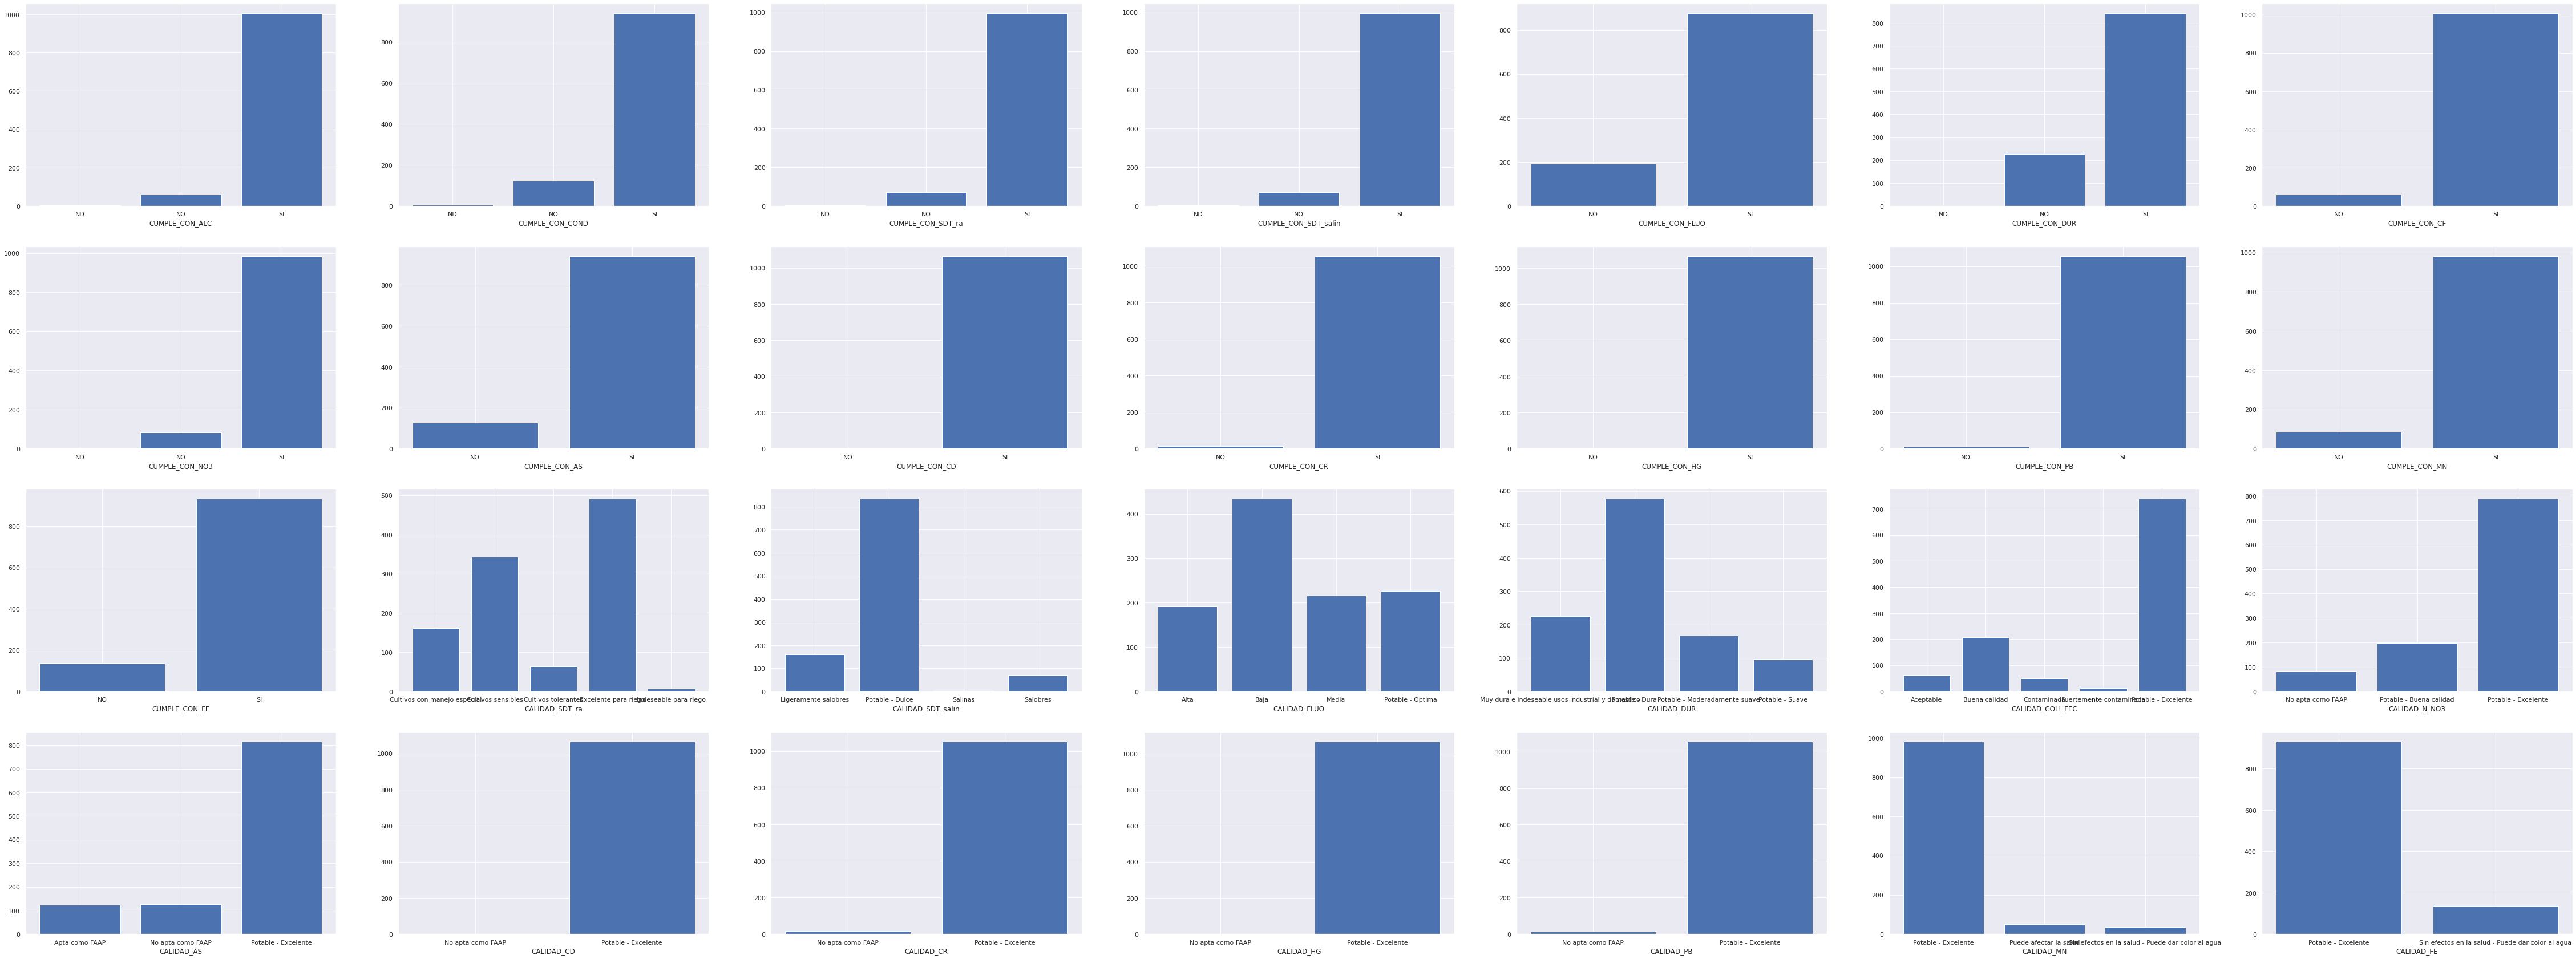

In [13]:
df_vars = vars_binarias + vars_ordinales
sns.set(rc = {'figure.figsize':(80, 30)})
fig, axes = plt.subplots(4, 7)

for k in range(len(df_vars)): 
    plt.subplot(4, 7, k+1)
    try:
        Transf0 = df_subterraneas.groupby(df_vars[k]).SEMAFORO.count().reset_index()
    except:
        Transf0 = df_subterraneas.groupby(df_vars[k]).CALIDAD_FE.count().reset_index()
    try:
        plt.bar(Transf0.iloc[:,0].astype(int).astype(str), Transf0.iloc[:,1])
    except:
        plt.bar(Transf0.iloc[:,0].astype(str), Transf0.iloc[:,1])

    plt.xlabel(df_vars[k])

Vemos que prácticamente todas las variables binarias están fuertemente desbalanceadas hacia una de las clases, al igual que algunas de las categóricas, por lo que también las eliminaremos al no obtener mucha información de ellas.

In [14]:
df_subterraneas.drop(vars_binarias + ['CALIDAD_CD', 'CALIDAD_CR','CALIDAD_HG', 'CALIDAD_PB','CALIDAD_MN','CALIDAD_FE'], axis=1, inplace= True)

Variables categóricas:

In [15]:
vars_categoricas = ['ORGANISMO_DE_CUENCA', 'ACUIFERO', 'SUBTIPO'] 

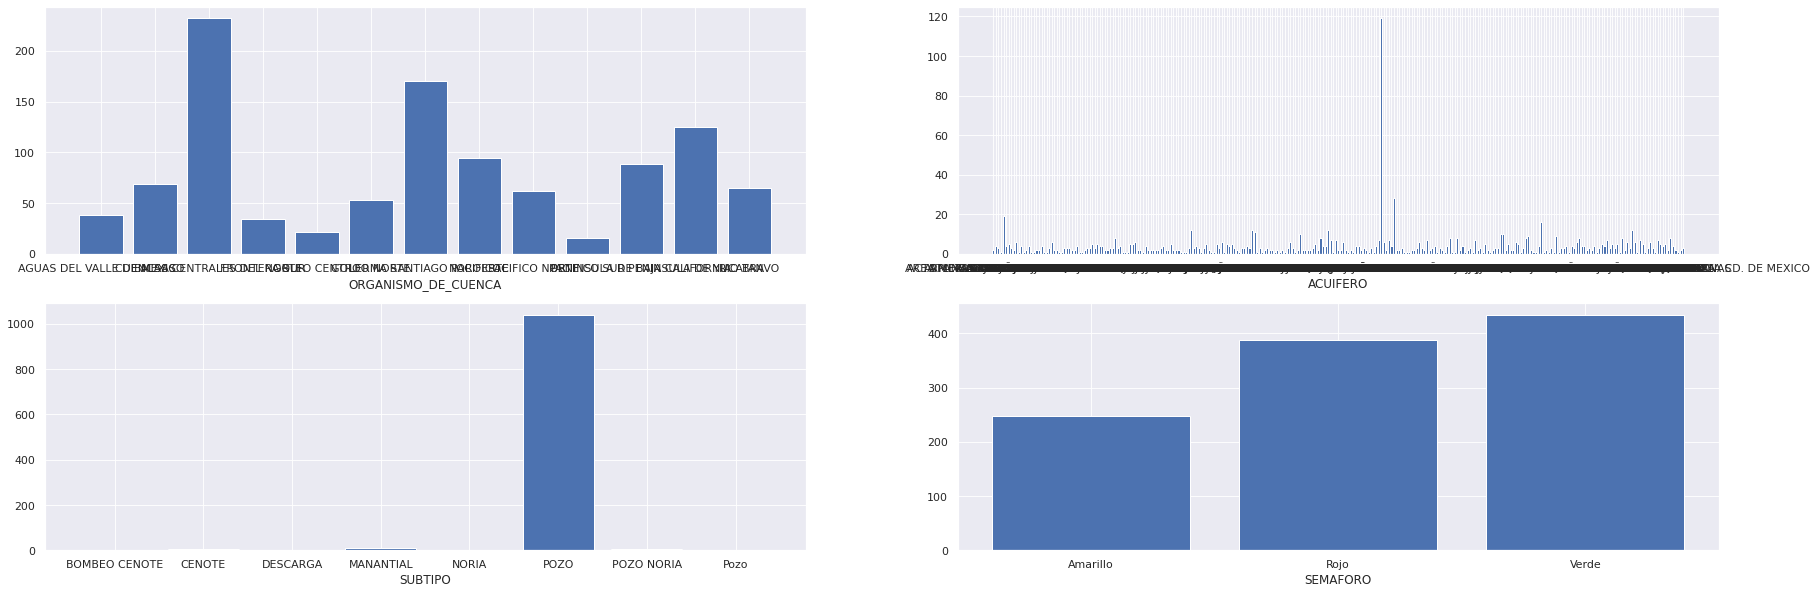

In [16]:
df_vars = vars_categoricas + ['SEMAFORO']
sns.set(rc = {'figure.figsize':(30, 10)})
fig, axes = plt.subplots(2, 2)

for k in range(len(df_vars)): 
    plt.subplot(2, 2, k+1)
    try:
        Transf0 = df_subterraneas.groupby(df_vars[k]).SEMAFORO.count().reset_index()
    except:
        Transf0 = df_subterraneas.groupby(df_vars[k]).CALIDAD_FLUO.count().reset_index()
    try:
        plt.bar(Transf0.iloc[:,0].astype(int).astype(str), Transf0.iloc[:,1])
    except:
        plt.bar(Transf0.iloc[:,0].astype(str), Transf0.iloc[:,1])

    plt.xlabel(df_vars[k])

Las variables SUBTIPO y ACUIFERO no parecen dar mucha información para discriminar observaciones, por lo que también las eliminamos.

In [17]:
df_subterraneas.drop(['ACUIFERO','SUBTIPO'], axis=1, inplace= True)

In [18]:
vars_categoricas = ['ORGANISMO_DE_CUENCA'] 

Variables numéricas continuas:

In [19]:
vars_numericas = ['LONGITUD','LATITUD', 'ALC_mg/L', 'CONDUCT_mS/cm']

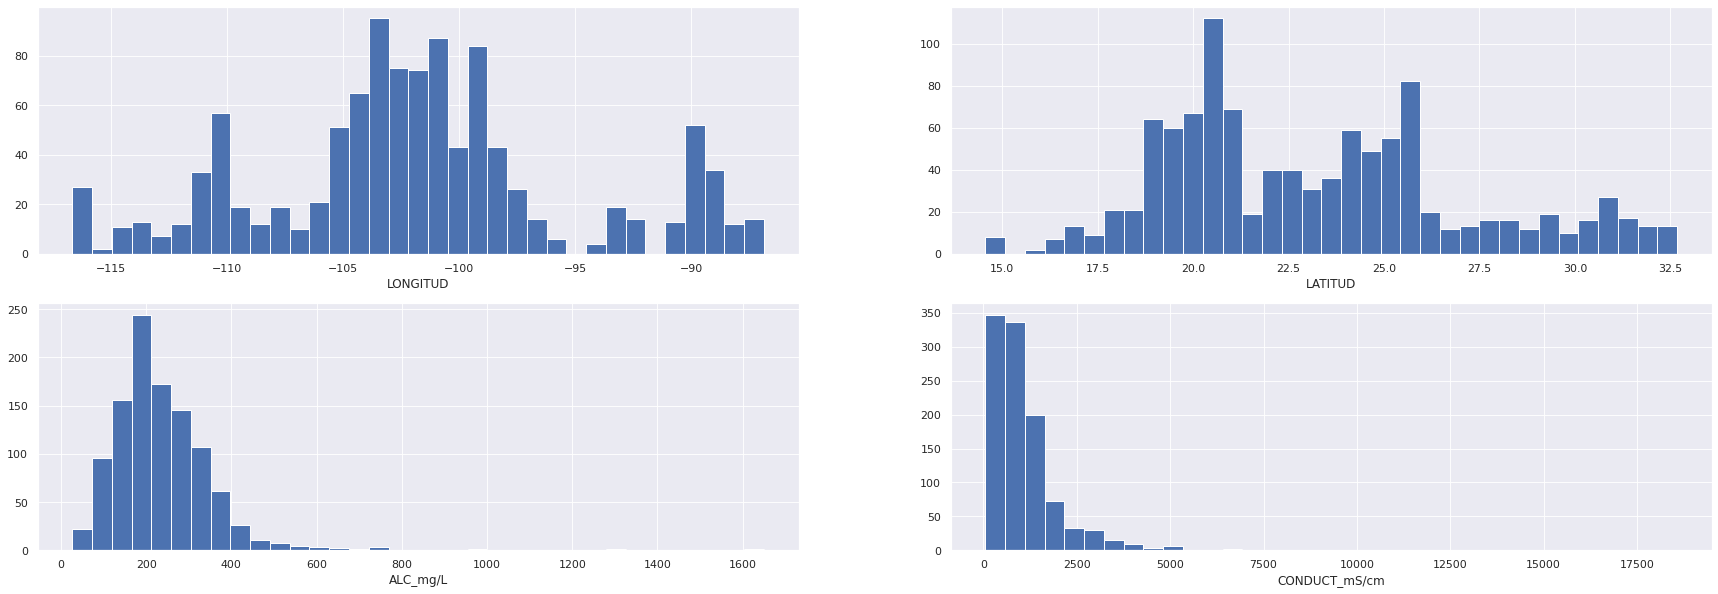

In [20]:
df_vars = vars_numericas
sns.set(rc = {'figure.figsize':(30, 10)})
fig, axes = plt.subplots(2, 2)

for k in range(len(df_vars)): 
    plt.subplot(2, 2, k+1)
    Transf0 = df_subterraneas[df_vars[k]] 
    try:
        plt.hist(Transf0, bins=35)
    except:
        print(df_vars[k])#plt.hist(Transf0.astype(float), bins=20)

    plt.xlabel(df_vars[k])

Como se puede observar en las gráficas, las variables numéricas se distribuyen en diferentes escalas; sin embargo, dado que vamos a entrenar un modelo de random forest, no es necesario escalarlas o estandarizarlas.

In [21]:
df_subterraneas.shape

(1068, 13)

Las siguientes variables cuentan con al menos un valor nulo:

In [22]:
NULLS= df_subterraneas.isnull().any()
NULLS[NULLS==True]

ALC_mg/L             True
CONDUCT_mS/cm        True
CALIDAD_SDT_ra       True
CALIDAD_SDT_salin    True
CALIDAD_DUR          True
CALIDAD_N_NO3        True
dtype: bool

Como se mencionó anteriormente las variables ALC_mg/L, CONDUCT_mS/cm, SDT_mg/L pueden ser llenadas con el promedio. Por su parte, los nulos de las variables categóricas pueden ser llenadados con la moda.

In [23]:
df_subterraneas['ALC_mg/L'].fillna(df_subterraneas['ALC_mg/L'].mean(), inplace= True)
df_subterraneas['CONDUCT_mS/cm'].fillna(df_subterraneas['CONDUCT_mS/cm'].mean(), inplace= True)
df_subterraneas['CALIDAD_SDT_ra'].fillna(df_subterraneas['CALIDAD_SDT_ra'].mode()[0], inplace= True)
df_subterraneas['CALIDAD_SDT_salin'].fillna(df_subterraneas['CALIDAD_SDT_salin'].mode()[0], inplace= True)
df_subterraneas['CALIDAD_DUR'].fillna(df_subterraneas['CALIDAD_DUR'].mode()[0], inplace= True)
df_subterraneas['CALIDAD_N_NO3'].fillna(df_subterraneas['CALIDAD_N_NO3'].mode()[0], inplace= True)
df_subterraneas.head()

,ORGANISMO_DE_CUENCA,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,CALIDAD_SDT_ra,CALIDAD_SDT_salin,CALIDAD_FLUO,CALIDAD_DUR,CALIDAD_COLI_FEC,CALIDAD_N_NO3,CALIDAD_AS,SEMAFORO
0,LERMA SANTIAGO PACIFICO,-102.02210,22.20887,229.990,940.0,Cultivos sensibles,Potable - Dulce,Potable - Optima,Potable - Dura,Potable - Excelente,Potable - Excelente,Apta como FAAP,Verde
1,LERMA SANTIAGO PACIFICO,-102.20075,21.99958,231.990,608.0,Excelente para riego,Potable - Dulce,Potable - Optima,Potable - Dura,Potable - Excelente,Potable - Buena calidad,Apta como FAAP,Verde
2,LERMA SANTIAGO PACIFICO,-102.28801,22.36685,204.920,532.0,Excelente para riego,Potable - Dulce,Alta,Potable - Dura,Potable - Excelente,Potable - Excelente,No apta como FAAP,Rojo
3,LERMA SANTIAGO PACIFICO,-102.29449,22.18435,327.000,686.0,Excelente para riego,Potable - Dulce,Potable - Optima,Potable - Dura,Potable - Excelente,Potable - Excelente,Apta como FAAP,Verde
4,PENINSULA DE BAJA CALIFORNIA,-110.24480,23.45138,309.885,1841.0,Cultivos con manejo especial,Ligeramente salobres,Baja,Potable - Dura,Aceptable,No apta como FAAP,Potable - Excelente,Rojo


Transformamos las variables categóricas y ordinales con un LabelEncoder():

In [24]:
le = preprocessing.LabelEncoder()
df_subterraneas['ORGANISMO_DE_CUENCA'] = le.fit_transform(df_subterraneas['ORGANISMO_DE_CUENCA'])
df_subterraneas.head()

,ORGANISMO_DE_CUENCA,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,CALIDAD_SDT_ra,CALIDAD_SDT_salin,CALIDAD_FLUO,CALIDAD_DUR,CALIDAD_COLI_FEC,CALIDAD_N_NO3,CALIDAD_AS,SEMAFORO
0,6,-102.02210,22.20887,229.990,940.0,Cultivos sensibles,Potable - Dulce,Potable - Optima,Potable - Dura,Potable - Excelente,Potable - Excelente,Apta como FAAP,Verde
1,6,-102.20075,21.99958,231.990,608.0,Excelente para riego,Potable - Dulce,Potable - Optima,Potable - Dura,Potable - Excelente,Potable - Buena calidad,Apta como FAAP,Verde
2,6,-102.28801,22.36685,204.920,532.0,Excelente para riego,Potable - Dulce,Alta,Potable - Dura,Potable - Excelente,Potable - Excelente,No apta como FAAP,Rojo
3,6,-102.29449,22.18435,327.000,686.0,Excelente para riego,Potable - Dulce,Potable - Optima,Potable - Dura,Potable - Excelente,Potable - Excelente,Apta como FAAP,Verde
4,10,-110.24480,23.45138,309.885,1841.0,Cultivos con manejo especial,Ligeramente salobres,Baja,Potable - Dura,Aceptable,No apta como FAAP,Potable - Excelente,Rojo


In [25]:
le = preprocessing.LabelEncoder()
le.fit(['Indeseable para riego', 'Cultivos tolerantes', 'Cultivos con manejo especial','Cultivos sensibles', 'Excelente para riego'])
df_subterraneas['CALIDAD_SDT_ra']= le.transform(df_subterraneas['CALIDAD_SDT_ra'])

le = preprocessing.LabelEncoder()
le.fit(['Ligeramente salobres', 'Salobres', 'Salinas','Potable - Dulce'])
df_subterraneas['CALIDAD_SDT_salin']= le.transform(df_subterraneas['CALIDAD_SDT_salin'])

le = preprocessing.LabelEncoder()
le.fit(['Baja', 'Media', 'Alta', 'Potable - Optima'])
df_subterraneas['CALIDAD_FLUO']= le.transform(df_subterraneas['CALIDAD_FLUO'])

le = preprocessing.LabelEncoder()
le.fit(['Muy dura e indeseable usos industrial y domestico', 'Potable - Dura', 'Potable - Moderadamente suave', 'Potable - Suave'])
df_subterraneas['CALIDAD_DUR']= le.transform(df_subterraneas['CALIDAD_DUR'])

le = preprocessing.LabelEncoder()
le.fit(['Fuertemente contaminada', 'Contaminada', 'Aceptable','Buena calidad', 'Potable - Excelente'])
df_subterraneas['CALIDAD_COLI_FEC']= le.transform(df_subterraneas['CALIDAD_COLI_FEC'])

le = preprocessing.LabelEncoder()
le.fit(['No apta como FAAP','Potable - Buena calidad', 'Potable - Excelente'])
df_subterraneas['CALIDAD_N_NO3']= le.transform(df_subterraneas['CALIDAD_N_NO3'])

le = preprocessing.LabelEncoder()
le.fit(['No apta como FAAP','Apta como FAAP', 'Potable - Excelente'])
df_subterraneas['CALIDAD_AS']= le.transform(df_subterraneas['CALIDAD_AS'])

df_subterraneas.head()

,ORGANISMO_DE_CUENCA,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,CALIDAD_SDT_ra,CALIDAD_SDT_salin,CALIDAD_FLUO,CALIDAD_DUR,CALIDAD_COLI_FEC,CALIDAD_N_NO3,CALIDAD_AS,SEMAFORO
0,6,-102.02210,22.20887,229.990,940.0,1,1,3,1,4,2,0,Verde
1,6,-102.20075,21.99958,231.990,608.0,3,1,3,1,4,1,0,Verde
2,6,-102.28801,22.36685,204.920,532.0,3,1,0,1,4,2,1,Rojo
3,6,-102.29449,22.18435,327.000,686.0,3,1,3,1,4,2,0,Verde
4,10,-110.24480,23.45138,309.885,1841.0,0,0,1,1,0,0,2,Rojo


Al graficar la matriz de correlación, vemos que las variables categóricas no están muy fuertemente relacionadas, a excepción de latitud y longitud, por lo que ya no eliminaremos más variables:

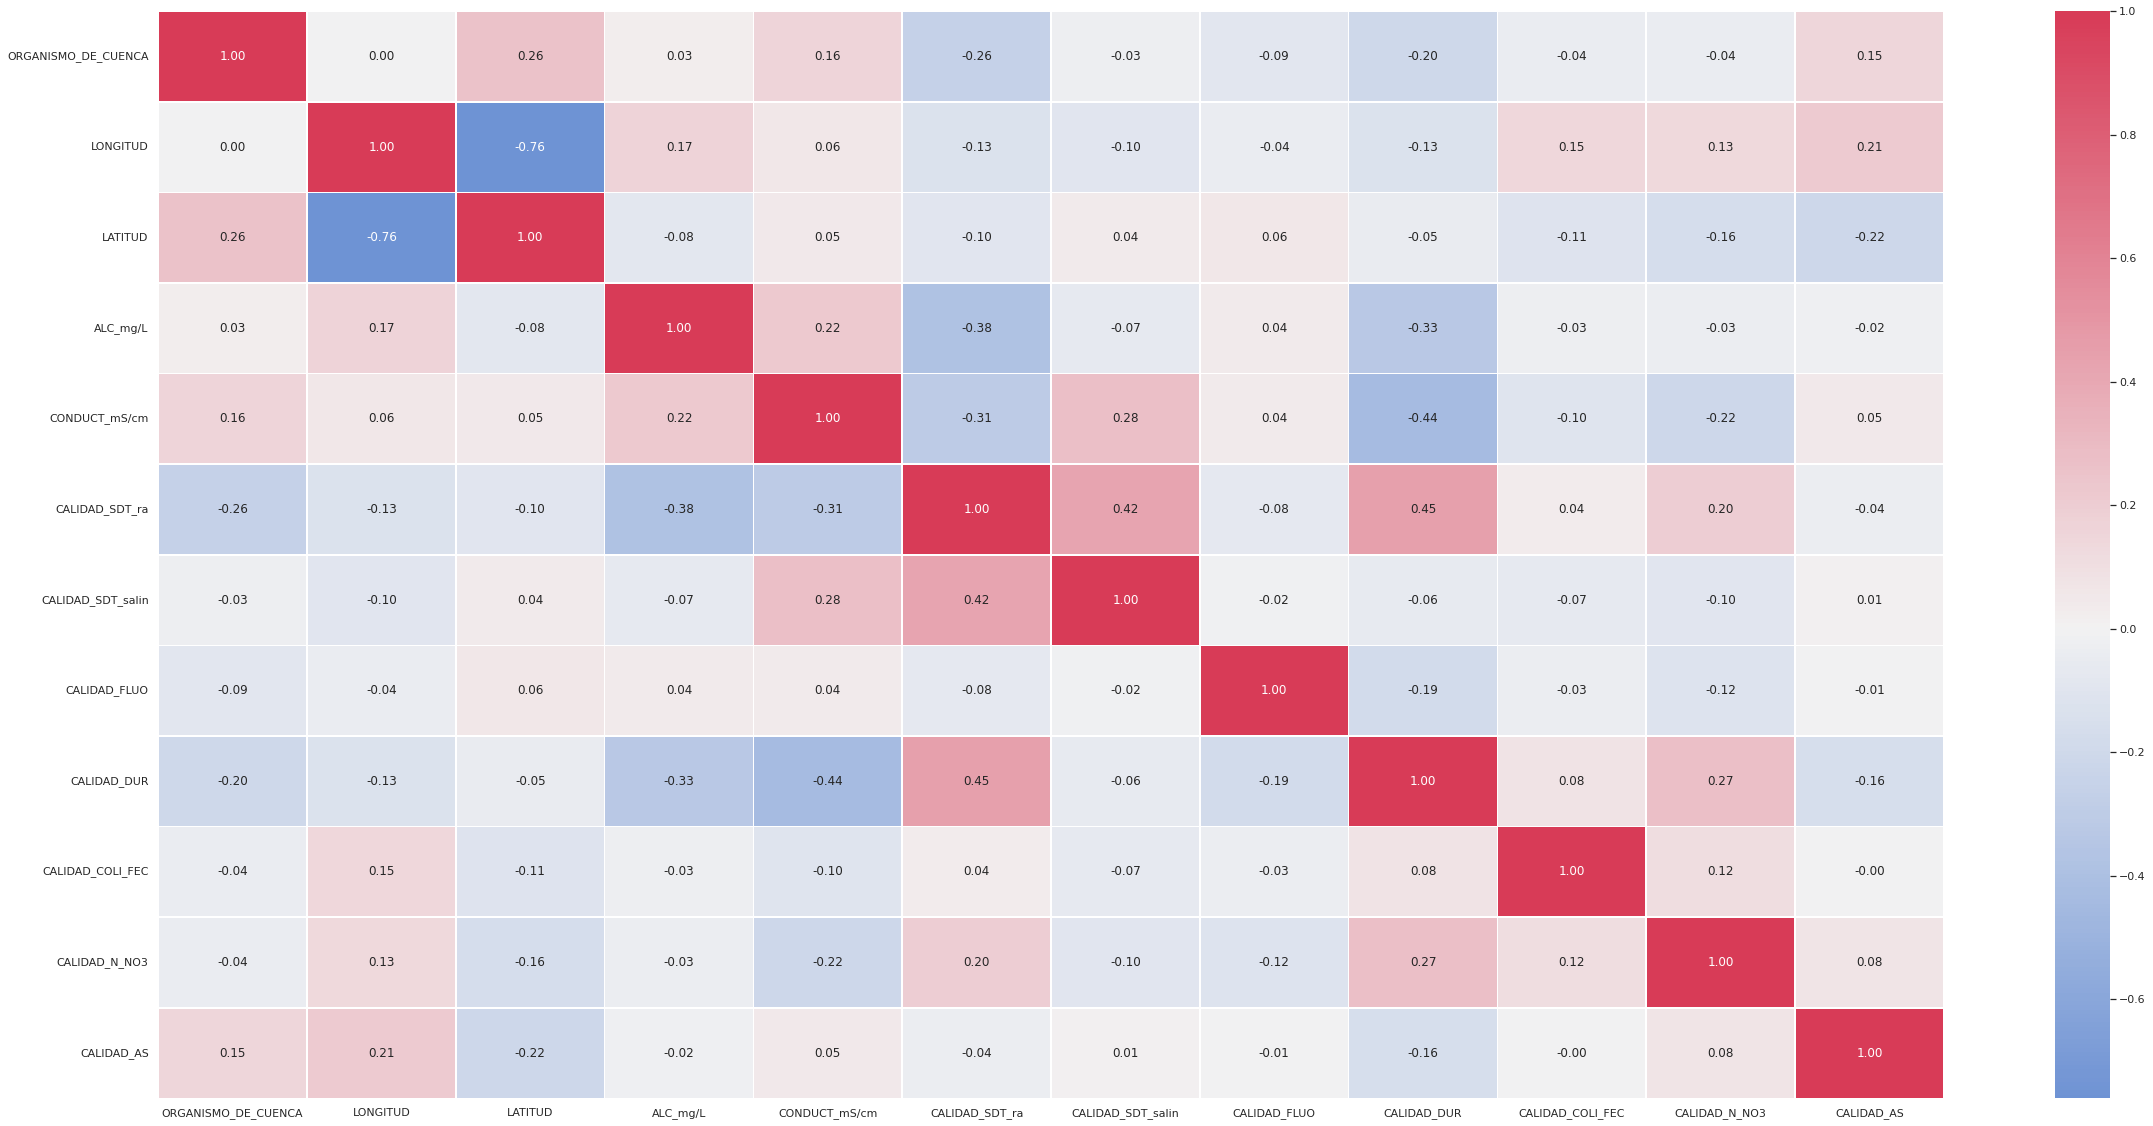

In [26]:
# Matriz de correlación
matriz_corr = df_subterraneas.corr()

mask = np.zeros_like(matriz_corr, dtype='bool')
#mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(40, 20))
cmap = sns.diverging_palette(255, 6, as_cmap=True)

figure = sns.heatmap(matriz_corr, mask=mask, cmap=cmap,
                     center=0, linewidths=0.5,
                     annot=True, fmt='.2f'
                     )

# K-means

In [27]:
X = df_subterraneas[['LATITUD','LONGITUD']]

In [28]:
# Método del codo para identificar el número de clusters
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [29]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 6.338194963880917
2 : 4.6555478916994995
3 : 3.1487607197605625
4 : 2.3923082514184673
5 : 2.1882895811766923
6 : 1.8876587097655924
7 : 1.7162965435594266
8 : 1.557407145352163
9 : 1.4268600143522638


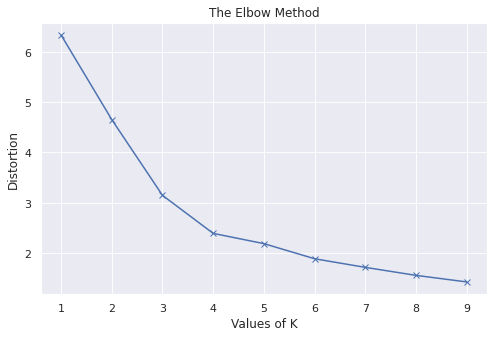

In [30]:
sns.set(rc = {'figure.figsize':(8, 5)})
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

De acuerdo con la curva anterior, se puede observar que el score deja de tener cambios tan grandes en los valores de 4 a 6, por lo que utilizaremos una K=4.

,ORGANISMO_DE_CUENCA,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,CALIDAD_SDT_ra,CALIDAD_SDT_salin,CALIDAD_FLUO,CALIDAD_DUR,CALIDAD_COLI_FEC,CALIDAD_N_NO3,CALIDAD_AS,SEMAFORO,CLUSTER
709,3,-92.18802,14.83955,98.37,226.0,3,1,1,1,0,2,2,Verde,2
949,8,-106.23798,23.32884,89.38,240.0,3,1,1,2,0,2,2,Verde,3
987,11,-89.55652,20.39698,231.11,1461.0,1,1,2,1,1,2,2,Amarillo,2
494,2,-100.90750,23.76060,287.49,555.0,3,1,1,1,2,2,2,Rojo,3
329,9,-99.79753,16.85920,140.00,485.0,3,1,1,1,1,2,2,Amarillo,1


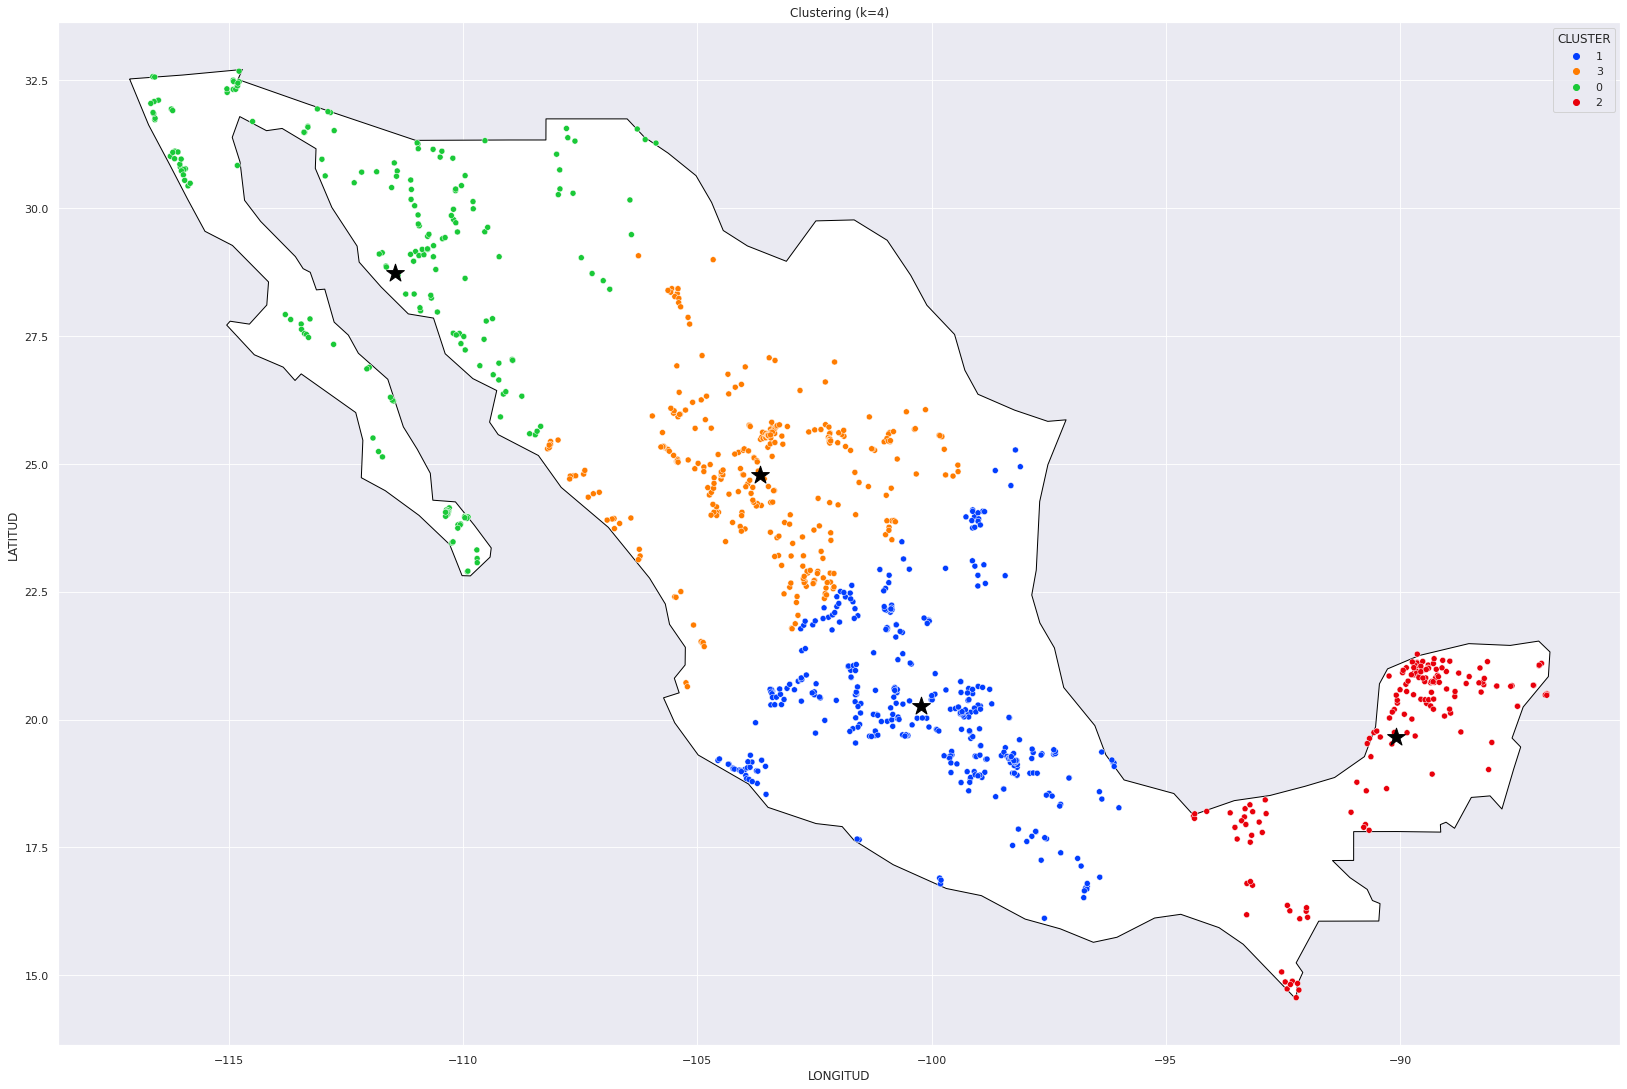

In [31]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

k = 4
model = cluster.KMeans(n_clusters=k, init='k-means++')


## clustering
dtf_X = X.copy()
dtf_X["cluster"] = model.fit_predict(X)

df_subterraneas[["CLUSTER"]] = dtf_X[["cluster"]]
df_subterraneas.CLUSTER = df_subterraneas.CLUSTER.astype(str)
display(df_subterraneas.sample(5))

# plot
fig, ax = plt.subplots(1,figsize=(28,20))
world.query("name == 'Mexico'").plot(ax = ax, edgecolor='black', color='white')
sns.scatterplot(x="LONGITUD", y="LATITUD", data=df_subterraneas, 
                palette=sns.color_palette("bright",k),
                hue='CLUSTER',
                legend="brief", ax=ax).set_title('Clustering (k='+str(k)+')')
th_centroids = model.cluster_centers_
ax.scatter(th_centroids[:,1], th_centroids[:,0], s=350, c='black', 
           marker="*")

Al observar los clusters y graficar la distribución del semáforo en cada uno de ellos, notamos que no hay realmente una relación entre la ubicación geográfica de los clusters y la calidad del agua, ya que dentro de todos ellos existen los 3 niveles del semáforo. Sin embargo, es importante notar que en los clusters 2 y 3 hay más presencia del nivel verde en comparación con los otros niveles. Además, en el cluster 0 hay más observaciones con agua de mala calidad y en el cluster 1 más observaciones con semáforo amarillo.

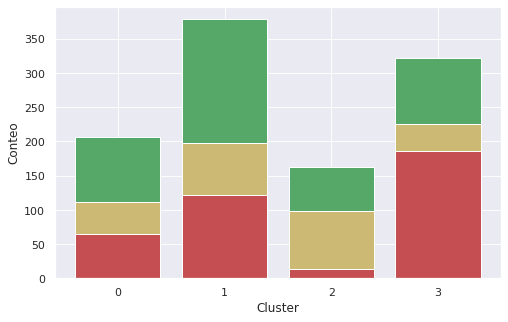

In [32]:
x = df_subterraneas['CLUSTER'].sort_values().unique()
y1 = df_subterraneas[df_subterraneas.SEMAFORO=='Rojo'].CLUSTER.sort_values().value_counts(sort=False)
y2 = df_subterraneas[df_subterraneas.SEMAFORO=='Amarillo'].CLUSTER.sort_values().value_counts(sort=False)
y3 = df_subterraneas[df_subterraneas.SEMAFORO=='Verde'].CLUSTER.sort_values().value_counts(sort=False)

plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='y')
plt.bar(x, y3, bottom=y1 + y2, color='g')
plt.xlabel('Cluster')
plt.ylabel('Conteo')
plt.show()

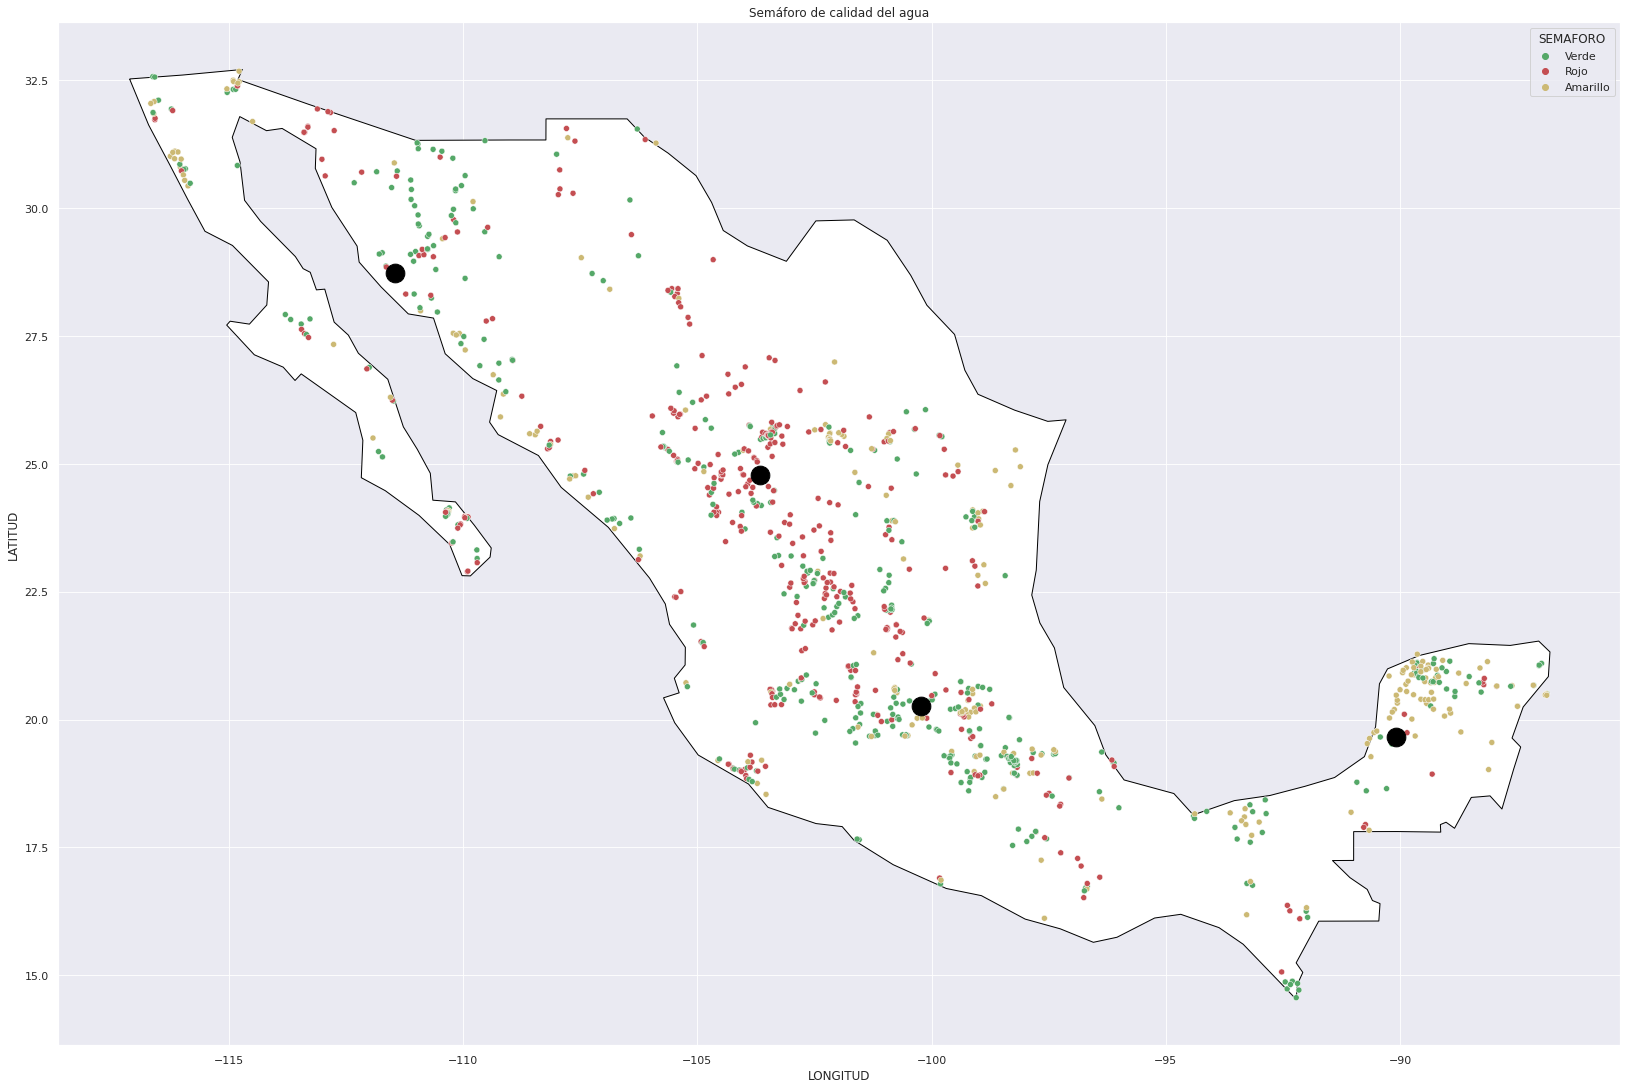

In [33]:
fig, ax = plt.subplots(1,figsize=(28,20))
world.query("name == 'Mexico'").plot(ax = ax, edgecolor='black', color='white')
sns.scatterplot(x="LONGITUD", y="LATITUD", data=df_subterraneas, 
                palette=['g','r','y'],
                hue='SEMAFORO',
                legend="brief", ax=ax).set_title('Semáforo de calidad del agua')
th_centroids = model.cluster_centers_
ax.scatter(th_centroids[:,1], th_centroids[:,0], s=350, c='black', 
           marker="o")

# Modelo de clasificación

In [64]:
from sklearn.model_selection import train_test_split,RepeatedStratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

In [65]:
df= df_subterraneas.drop('CLUSTER', axis=1)
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [66]:
le = preprocessing.LabelEncoder()
Y = le.fit_transform(Y)

In [68]:

# dicc_grid_arbol = {'ccp_alpha':[0.0],
#              'criterion':['entropy', 'gini'],
#              'max_depth': [5, 10],
#              'min_samples_split': [2,4],
#              'class_weight': ['balanced']
#              }

# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)

# grid = GridSearchCV(estimator=DecisionTreeClassifier(), 
#                     param_grid=dicc_grid_arbol, 
#                     cv=cv, 
#                     scoring='recall')

# grid.fit(X_train, np.ravel(y_train))

Feature: 0, Score: 0.02856
Feature: 1, Score: 0.05384
Feature: 2, Score: 0.10627
Feature: 3, Score: 0.08380
Feature: 4, Score: 0.12032
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00946
Feature: 7, Score: 0.21676
Feature: 8, Score: 0.16835
Feature: 9, Score: 0.12537
Feature: 10, Score: 0.10787
Feature: 11, Score: 0.14700


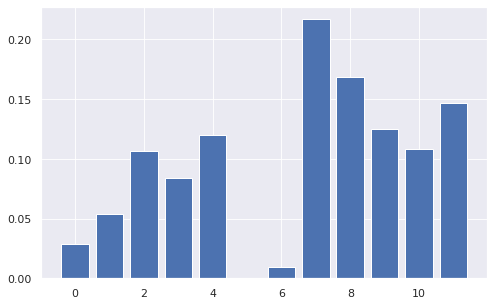

In [72]:
modelo_DTC = DecisionTreeClassifier()

modelo_DTC.fit(X, Y)

importance = permutation_importance(modelo_DTC, X, Y, n_repeats=10)

for i,v in enumerate(importance['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
plt.bar([x for x in range(len(importance['importances_mean']))], importance['importances_mean'])
plt.show()

Feature: 0, Score: 0.02397
Feature: 1, Score: 0.04429
Feature: 2, Score: 0.05019
Feature: 3, Score: 0.05112
Feature: 4, Score: 0.07116
Feature: 5, Score: 0.00637
Feature: 6, Score: 0.00019
Feature: 7, Score: 0.20431
Feature: 8, Score: 0.16788
Feature: 9, Score: 0.07041
Feature: 10, Score: 0.09579
Feature: 11, Score: 0.11910


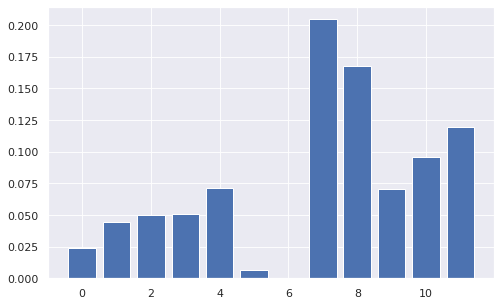

In [77]:
modelo_RFC = RandomForestClassifier()

modelo_RFC.fit(X, Y)

importance = permutation_importance(modelo_RFC, X, Y, n_repeats=10)

for i,v in enumerate(importance['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
plt.bar([x for x in range(len(importance['importances_mean']))], importance['importances_mean'])
plt.show()

In [83]:
X2 = pd.concat([X.iloc[:,4], X.iloc[:,7:]], axis=1)
X2.head()

,CONDUCT_mS/cm,CALIDAD_FLUO,CALIDAD_DUR,CALIDAD_COLI_FEC,CALIDAD_N_NO3,CALIDAD_AS
0,940.0,3,1,4,2,0
1,608.0,3,1,4,1,0
2,532.0,0,1,4,2,1
3,686.0,3,1,4,2,0
4,1841.0,1,1,0,0,2


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X2, Y, train_size=0.85)